Density based clustering as the name suggests works by identifying areas where data points are
concentrated and where they are separated by areas that are sparse. In this section we will learn and
implement one such technique.


(a) DBSCAN is probably the most popular density based clustering algorithm and is also a recipient
of KDD Test of Time Award.


(b) (2+2 points) Mention two advantages and disadvantages of DBSCAN.

(c) (2 points) Choose any one density based clustering algorithm other than DBSCAN and state
its 2 advantages over DBSCAN.



(d) (10+10+10 points) Implement the chosen algorithm using any library on all the 3 datasets
and show the best results obtained respectively.

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
! cp drive/MyDrive/DMG/Assignment3/Mall_Customers.csv .
! cp drive/MyDrive/DMG/Assignment3/wine.data .
! cp drive/MyDrive/DMG/Assignment3/Iris.csv .

In [ ]:
from scipy.stats import entropy
def intrinsic(ground_truth, labels):
  a = len(np.unique(ground_truth))
  b = len(np.unique(labels))
  factor = 1
  if(a > b):
    factor = b/a
  purity = []
  entropy_list = []
  prob_arr = []
  count = 0
  count_dict = {}
  previous_val = ground_truth[0]
  for i in range(len(ground_truth)):
    if(previous_val != ground_truth[i]):
      max_count = 0
      for label in count_dict:
        prob_arr.append(count_dict[label]/count)
        if(count_dict[label] > max_count):
          max_count = count_dict[label]
      purity.append(max_count/count * factor)
      entropy_list.append(entropy(prob_arr,base=2))
      count_dict = {}
      previous_val = ground_truth[i]
      count = 0
      prob_arr = []
    count+=1
    if labels[i] in count_dict:
      count_dict[labels[i]] +=1
    else:
      count_dict[labels[i]] = 1
  if(previous_val!= None):
    max_count = 0
    for label in count_dict:
      if(count_dict[label] > max_count):
        prob_arr.append(count_dict[label]/count)
        max_count = count_dict[label]
    purity.append(max_count/count * factor)
    entropy_list.append(entropy(prob_arr,base=2))
    count_dict = {}
  print("Cluster purities are {}".format(purity))
  print("Entropies of clusters are {}".format(entropy_list))

In [ ]:
import random
def bootstrap_func(data_arr):
  new_arr = []
  length = len(data_arr)
  for i in range(length):
    index = random.randrange(0, length, 1)
    new_arr.append(data_arr[index])
  new_arr = np.array(new_arr)
  return new_arr

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
def cluster_evaluation(data,c_labels,ground_truth):
  print("Silhouette Coefficient is {}".format(silhouette_score(data, c_labels)))
  print("Davies Bouldin index is {}".format(davies_bouldin_score(data, c_labels)))
  intrinsic(ground_truth,c_labels)

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
def cluster_func_visualization(data_normalized,labels):
  tsne = TSNE(n_components=2)
  X_tsne = tsne.fit_transform(data_normalized)
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)

In [ ]:
import pandas as pd
data = pd.read_csv("Mall_Customers.csv")
data = data.drop(["CustomerID"], axis = 1)


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
data_array = data[["Annual Income (k$)","Spending Score (1-100)"]]
normalizer = StandardScaler()
normalizer.fit(data_array)
data_normalized = data_array

In [ ]:
pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 50.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039167 sha256=8d8b1151c6ffff6661192aeb814dece12dca025873e0f4be87647170092ce2aa
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.5
    Uninstalling Cython-3.0.5:
      Successfully uninstalled Cython-3.0.5


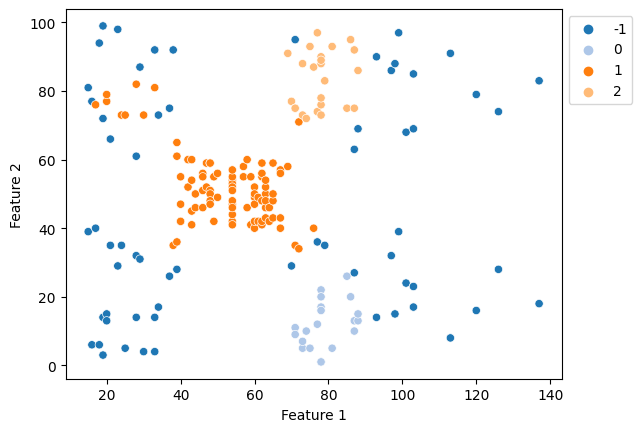

Silhouette Coefficient is 0.264151070374267
Davies Bouldin index is 4.1111952219968195


In [ ]:
import matplotlib.pyplot as plt
from hdbscan import HDBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Create and fit an  HDBSCAN model
hdbscan = HDBSCAN(min_cluster_size=10)
labels = hdbscan.fit_predict(data_normalized)
cluster_arr = np.concatenate((data_normalized, labels.reshape(200,1)), axis=1)
cluster_dataframe = pd.DataFrame(data =cluster_arr, columns=["feature1","feature2","label"])
sns.scatterplot(data=cluster_dataframe,x ="feature1", y = "feature2", hue="label",palette="tab20")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()
print("Silhouette Coefficient is {}".format(silhouette_score(data_normalized, labels)))
print("Davies Bouldin index is {}".format(davies_bouldin_score(data_normalized, labels)))

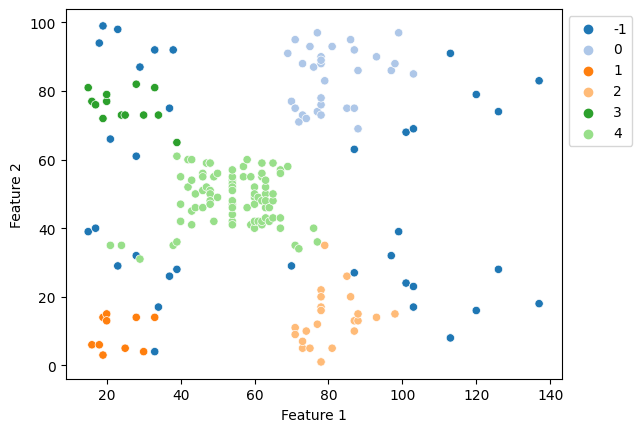

Silhouette Coefficient is 0.3835838178228424
Davies Bouldin index is 2.247700905628029


In [ ]:
hdbscan = HDBSCAN(min_cluster_size=5)
labels = hdbscan.fit_predict(data_normalized)
cluster_arr = np.concatenate((data_normalized, labels.reshape(200,1)), axis=1)
cluster_dataframe = pd.DataFrame(data =cluster_arr, columns=["feature1","feature2","label"])
sns.scatterplot(data=cluster_dataframe,x ="feature1", y = "feature2", hue="label",palette="tab20")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()
print("Silhouette Coefficient is {}".format(silhouette_score(data_normalized, labels)))
print("Davies Bouldin index is {}".format(davies_bouldin_score(data_normalized, labels)))

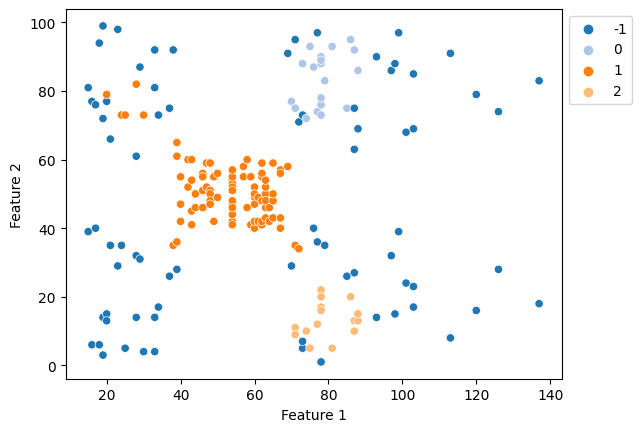

Silhouette Coefficient is 0.19528679239918098
Davies Bouldin index is 4.090148875477


In [ ]:
hdbscan = HDBSCAN(min_cluster_size=12,cluster_selection_epsilon=1)
labels = hdbscan.fit_predict(data_normalized)
cluster_arr = np.concatenate((data_normalized, labels.reshape(200,1)), axis=1)
cluster_dataframe = pd.DataFrame(data =cluster_arr, columns=["feature1","feature2","label"])
sns.scatterplot(data=cluster_dataframe,x ="feature1", y = "feature2", hue="label",palette="tab20")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()
print("Silhouette Coefficient is {}".format(silhouette_score(data_normalized, labels)))
print("Davies Bouldin index is {}".format(davies_bouldin_score(data_normalized, labels)))

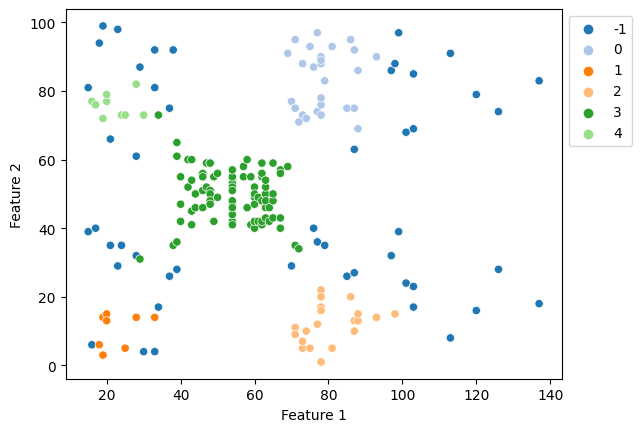

Silhouette Coefficient is 0.3174948323251468
Davies Bouldin index is 2.369330590888367


In [ ]:
hdbscan = HDBSCAN(min_cluster_size=7,cluster_selection_epsilon=0.1)
labels = hdbscan.fit_predict(data_normalized)
cluster_arr = np.concatenate((data_normalized, labels.reshape(200,1)), axis=1)
cluster_dataframe = pd.DataFrame(data =cluster_arr, columns=["feature1","feature2","label"])
sns.scatterplot(data=cluster_dataframe,x ="feature1", y = "feature2", hue="label",palette="tab20")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()
print("Silhouette Coefficient is {}".format(silhouette_score(data_normalized, labels)))
print("Davies Bouldin index is {}".format(davies_bouldin_score(data_normalized, labels)))

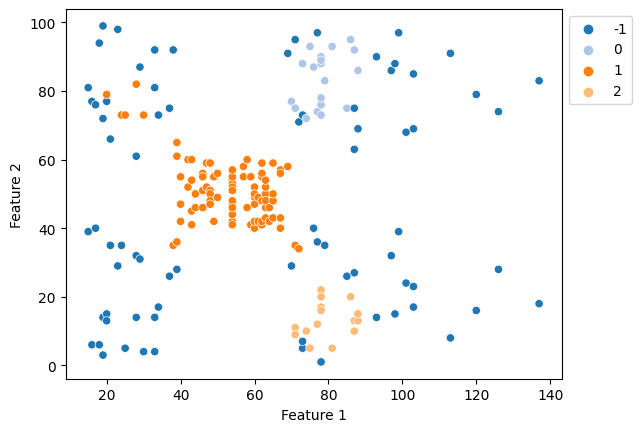

Silhouette Coefficient is 0.19528679239918098
Davies Bouldin index is 4.090148875477


In [ ]:
hdbscan = HDBSCAN(min_cluster_size=12)
labels = hdbscan.fit_predict(data_normalized)
cluster_arr = np.concatenate((data_normalized, labels.reshape(200,1)), axis=1)
cluster_dataframe = pd.DataFrame(data =cluster_arr, columns=["feature1","feature2","label"])
sns.scatterplot(data=cluster_dataframe,x ="feature1", y = "feature2", hue="label",palette="tab20")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()
print("Silhouette Coefficient is {}".format(silhouette_score(data_normalized, labels)))
print("Davies Bouldin index is {}".format(davies_bouldin_score(data_normalized, labels)))

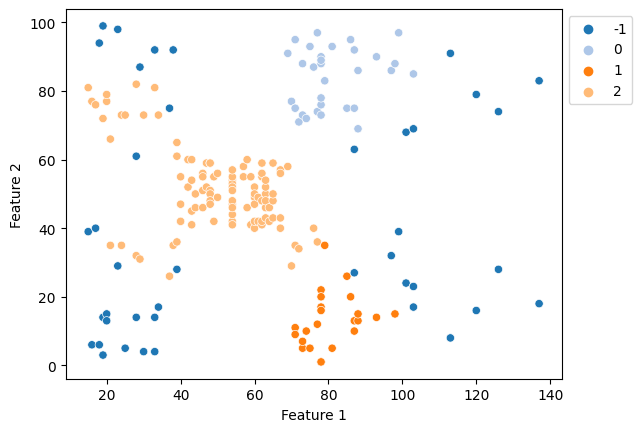

Silhouette Coefficient is 0.35021045856514504
Davies Bouldin index is 3.1174394956345948


In [ ]:
hdbscan = HDBSCAN(min_cluster_size=20)
labels = hdbscan.fit_predict(data_normalized)
cluster_arr = np.concatenate((data_normalized, labels.reshape(200,1)), axis=1)
cluster_dataframe = pd.DataFrame(data =cluster_arr, columns=["feature1","feature2","label"])
sns.scatterplot(data=cluster_dataframe,x ="feature1", y = "feature2", hue="label",palette="tab20")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()
print("Silhouette Coefficient is {}".format(silhouette_score(data_normalized, labels)))
print("Davies Bouldin index is {}".format(davies_bouldin_score(data_normalized, labels)))

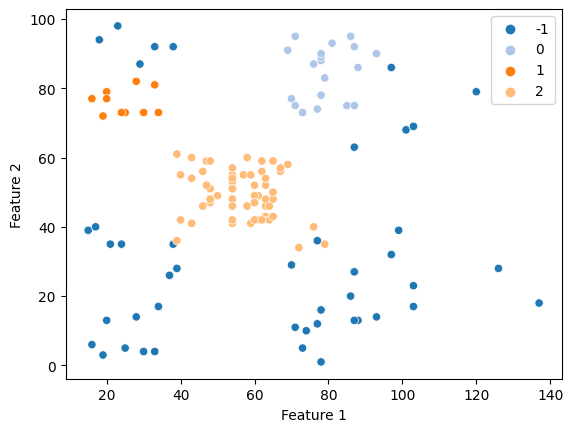

Silhouette Coefficient is 0.3478214497496882
Davies Bouldin index is 1.897673835820242


In [ ]:
data_normalized = np.array(data_normalized)
new_data = bootstrap_func(data_normalized)
hdbscan = HDBSCAN(min_cluster_size=10)
labels = hdbscan.fit_predict(new_data)
cluster_arr = np.concatenate((new_data, labels.reshape(200,1)), axis=1)
cluster_dataframe = pd.DataFrame(data =cluster_arr, columns=["feature1","feature2","label"])
sns.scatterplot(data=cluster_dataframe,x ="feature1", y = "feature2", hue="label",palette="tab20")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()
print("Silhouette Coefficient is {}".format(silhouette_score(new_data, labels)))
print("Davies Bouldin index is {}".format(davies_bouldin_score(new_data, labels)))

In [ ]:
import pandas as pd
data = pd.read_csv("wine.data")

In [ ]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
data_x = np.array(data.loc[:,data.columns != "1"])
data_y = np.array(data.loc[:,data.columns == "1"])
data_y = [x[0] for x in data_y]
data_array = np.array(data_x)
normalizer.fit(data_array)
data_normalized = normalizer.transform(data_array)

Silhouette Coefficient is 0.03957050764295184
Davies Bouldin index is 2.9647636602466476
Cluster purities are [0.7586206896551724, 0.6338028169014085, 0.5625]
Entropies of clusters are [0.7973265101474424, 0.9477073729342067, 0.0]


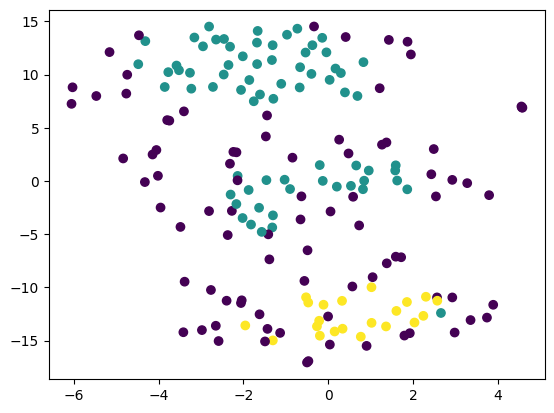

In [ ]:
hdbscan = HDBSCAN(min_cluster_size=15)
labels = hdbscan.fit_predict(data_normalized)
cluster_func_visualization(data_normalized,labels)
cluster_evaluation(data_normalized,labels,data_y)

Silhouette Coefficient is 0.04121106385558935
Davies Bouldin index is 3.3663328232796896
Cluster purities are [0.4482758620689655, 0.5211267605633803, 0.5833333333333334]
Entropies of clusters are [1.4104064801199905, 1.3206557483749497, 0.0]


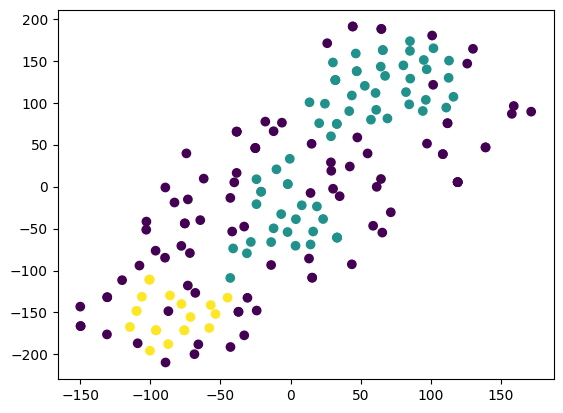

In [ ]:
new_data = bootstrap_func(data_normalized)
hdbscan = HDBSCAN(min_cluster_size=10)
labels = hdbscan.fit_predict(new_data)
cluster_func_visualization(new_data,labels)
cluster_evaluation(new_data,labels,data_y)

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("Iris.csv")
data["Species"] = data["Species"].apply(lambda x: 0 if x=='Iris-setosa'else
                                           2 if x == "Iris-virginica" else 1 )

In [ ]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
data_x = np.array(data.loc[:,data.columns != "Species"])
data_y = np.array(data.loc[:,data.columns == "Species"])
data_y = [x[0] for x in data_y]
data_array = np.array(data_x)
normalizer.fit(data_array)
data_normalized = normalizer.transform(data_array)

Silhouette Coefficient is 0.43467143265757235
Davies Bouldin index is 2.314837480883122
Cluster purities are [0.82, 0.94, 0.86]
Entropies of clusters are [0.6800770457282799, 0.3274449191544763, 0.0]


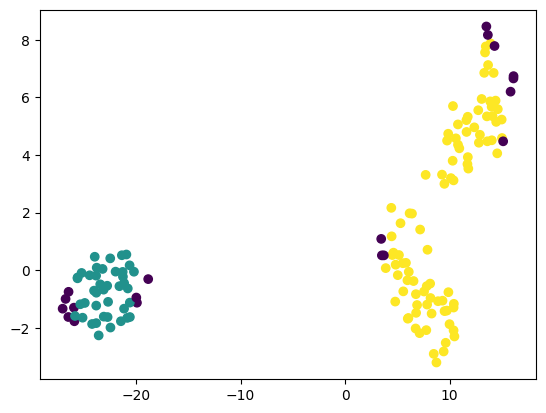

In [ ]:
hdbscan = HDBSCAN(min_cluster_size=20,min_samples=40)
labels = hdbscan.fit_predict(data_normalized)
cluster_func_visualization(data_normalized,labels)
cluster_evaluation(data_normalized,labels,data_y)

Silhouette Coefficient is 0.47336839452966634
Davies Bouldin index is 0.5283869657359687
Cluster purities are [0.7, 0.72, 0.56]
Entropies of clusters are [0.8812908992306927, 0.8554508105601307, 0.0]


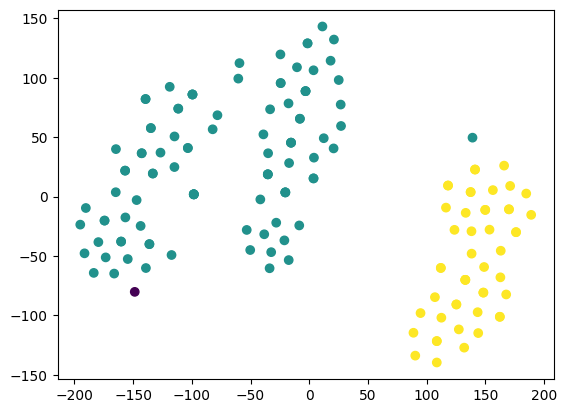

In [ ]:
new_data = bootstrap_func(data_normalized)
hdbscan = HDBSCAN(min_cluster_size=10,min_samples=5)
labels = hdbscan.fit_predict(new_data)
cluster_func_visualization(new_data,labels)
cluster_evaluation(new_data,labels,data_y)